# Reservation Cancellation Prediction

   Predict the status of the reservation

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
data = pd.read_csv('train__dataset.csv')
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


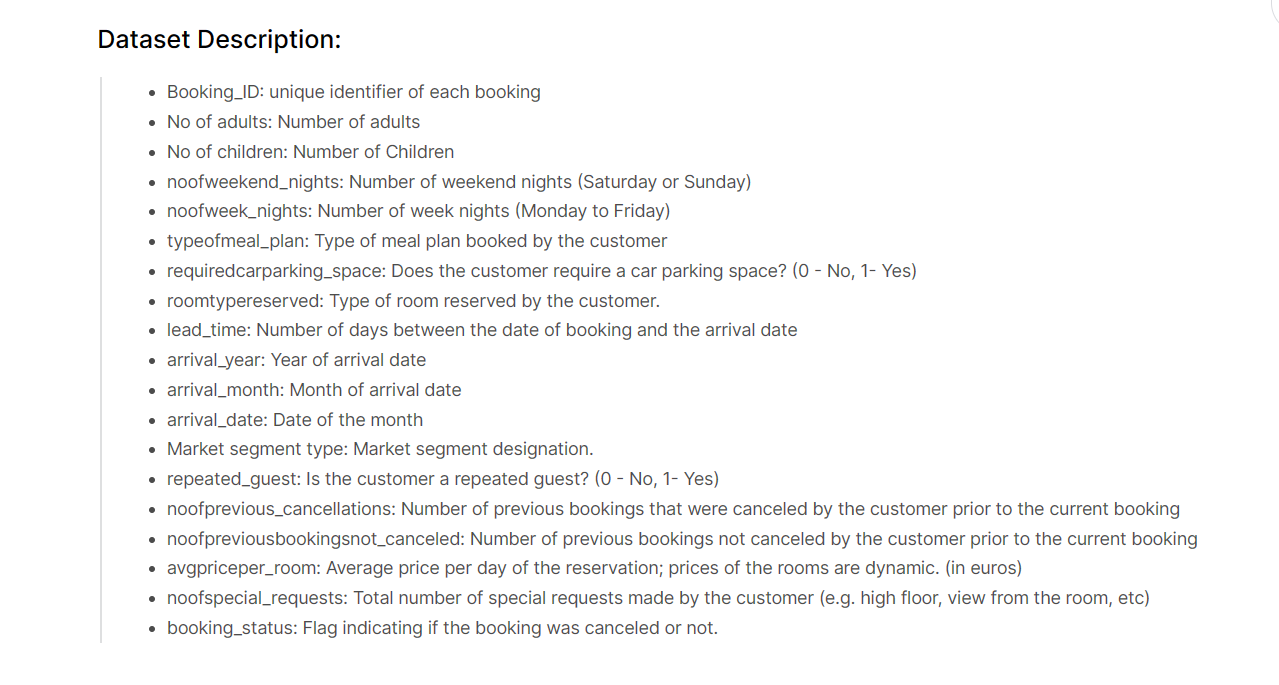

### EDA

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [110]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

We don't have missing values

In [111]:
data.shape

(18137, 18)

In [112]:
data.duplicated().sum()

4111

In [113]:
data.drop_duplicates(inplace=True)
data.shape

(14026, 18)

In [114]:
data.describe().T.style

,count,mean,std,min,25%,50%,75%,max
no_of_adults,14026.000000,1.883003,0.525093,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,14026.000000,0.136318,0.457332,0.000000,0.000000,0.000000,0.000000,9.000000
no_of_weekend_nights,14026.000000,0.874091,0.888414,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,14026.000000,2.249964,1.512388,0.000000,1.000000,2.000000,3.000000,17.000000
type_of_meal_plan,14026.000000,0.263439,0.539597,0.000000,0.000000,0.000000,0.000000,3.000000
required_car_parking_space,14026.000000,0.040425,0.196961,0.000000,0.000000,0.000000,0.000000,1.000000
room_type_reserved,14026.000000,0.416084,0.846245,0.000000,0.000000,0.000000,1.000000,6.000000
lead_time,14026.000000,68.929274,71.364912,0.000000,12.000000,46.000000,104.000000,443.000000
arrival_year,14026.000000,2017.845501,0.361439,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,14026.000000,7.372950,3.136265,1.000000,5.000000,8.000000,10.000000,12.000000


We can see high deviation in 'lead time' and 'avg_price_per_room' features

### Data Visualization

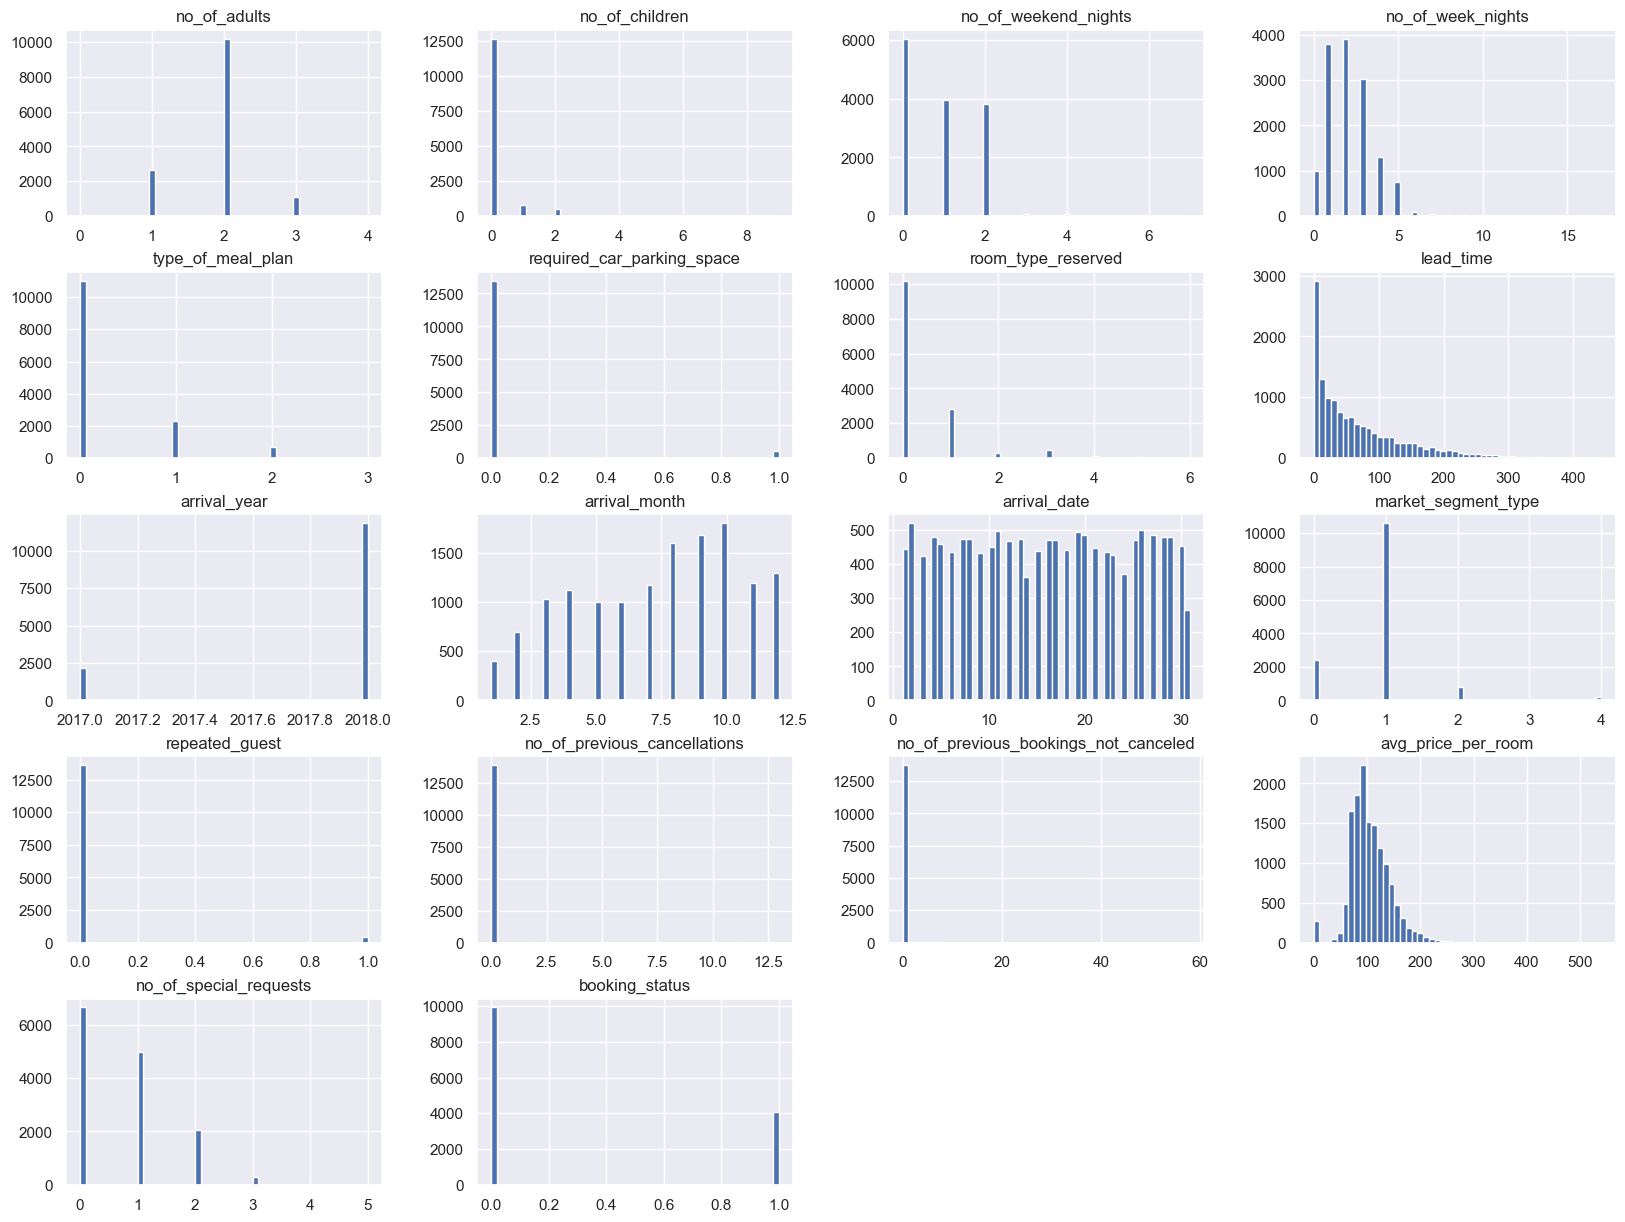

In [115]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [116]:
features = data.drop(columns = ['booking_status'])
target = data['booking_status']

features.shape, target.shape

((14026, 17), (14026,))

<AxesSubplot:xlabel='booking_status', ylabel='count'>

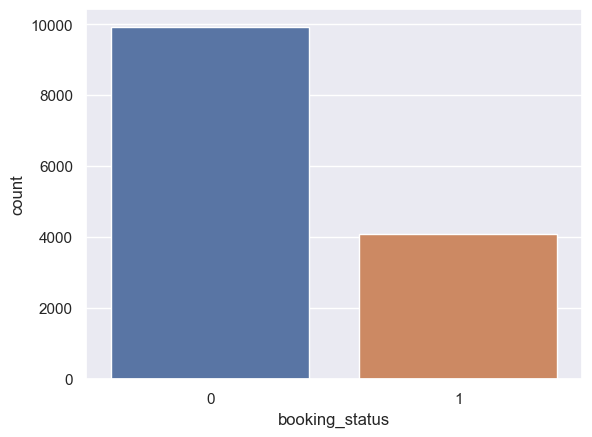

In [117]:
sns.countplot(x = target)

### Correlation Matrix

In [118]:
data.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.038095,0.083511,0.116197,0.001335,-0.000457,0.157217,0.147235,0.098230,0.004850,0.029085,-0.169853,-0.236344,-0.054339,-0.140422,0.318928,0.151996,0.104313
no_of_children,-0.038095,1.000000,0.008378,0.013718,-0.057121,0.014808,0.480933,-0.003397,0.031662,0.015009,0.018709,0.034913,-0.048283,-0.019074,-0.028124,0.353972,0.101236,0.062914
no_of_weekend_nights,0.083511,0.008378,1.000000,0.232453,-0.016475,-0.047923,0.017527,0.125966,0.033564,0.014782,0.007948,-0.091595,-0.076252,-0.021730,-0.027973,-0.005098,0.015447,0.064921
no_of_week_nights,0.116197,0.013718,0.232453,1.000000,-0.044176,-0.062409,0.060625,0.212355,0.026045,0.035077,0.001231,-0.093397,-0.107492,-0.027123,-0.046583,0.027314,0.028712,0.125330
type_of_meal_plan,0.001335,-0.057121,-0.016475,-0.044176,1.000000,-0.008299,-0.144346,0.053387,0.031029,0.014070,0.002629,-0.079557,-0.068825,-0.015523,-0.045692,0.009002,-0.033863,0.056281
required_car_parking_space,-0.000457,0.014808,-0.047923,-0.062409,-0.008299,1.000000,0.014579,-0.058218,-0.003405,-0.017252,-0.012579,0.091262,0.115335,0.026913,0.059026,0.057455,0.064732,-0.092838
room_type_reserved,0.157217,0.480933,0.017527,0.060625,-0.144346,0.014579,1.000000,-0.016156,0.057498,0.012263,0.024834,0.106200,-0.019453,-0.004994,-0.010771,0.425406,0.073581,0.061940
lead_time,0.147235,-0.003397,0.125966,0.212355,0.053387,-0.058218,-0.016156,1.000000,0.172204,0.136389,0.042997,-0.191888,-0.143320,-0.046367,-0.085323,-0.049489,-0.017806,0.371613
arrival_year,0.098230,0.031662,0.033564,0.026045,0.031029,-0.003405,0.057498,0.172204,1.000000,-0.329521,0.010153,0.020790,-0.014960,0.011796,0.024007,0.182467,-0.002268,0.163536
arrival_month,0.004850,0.015009,0.014782,0.035077,0.014070,-0.017252,0.012263,0.136389,-0.329521,1.000000,-0.014705,-0.009743,-0.008634,-0.046807,-0.015275,0.065930,0.128307,-0.016197


<AxesSubplot:>

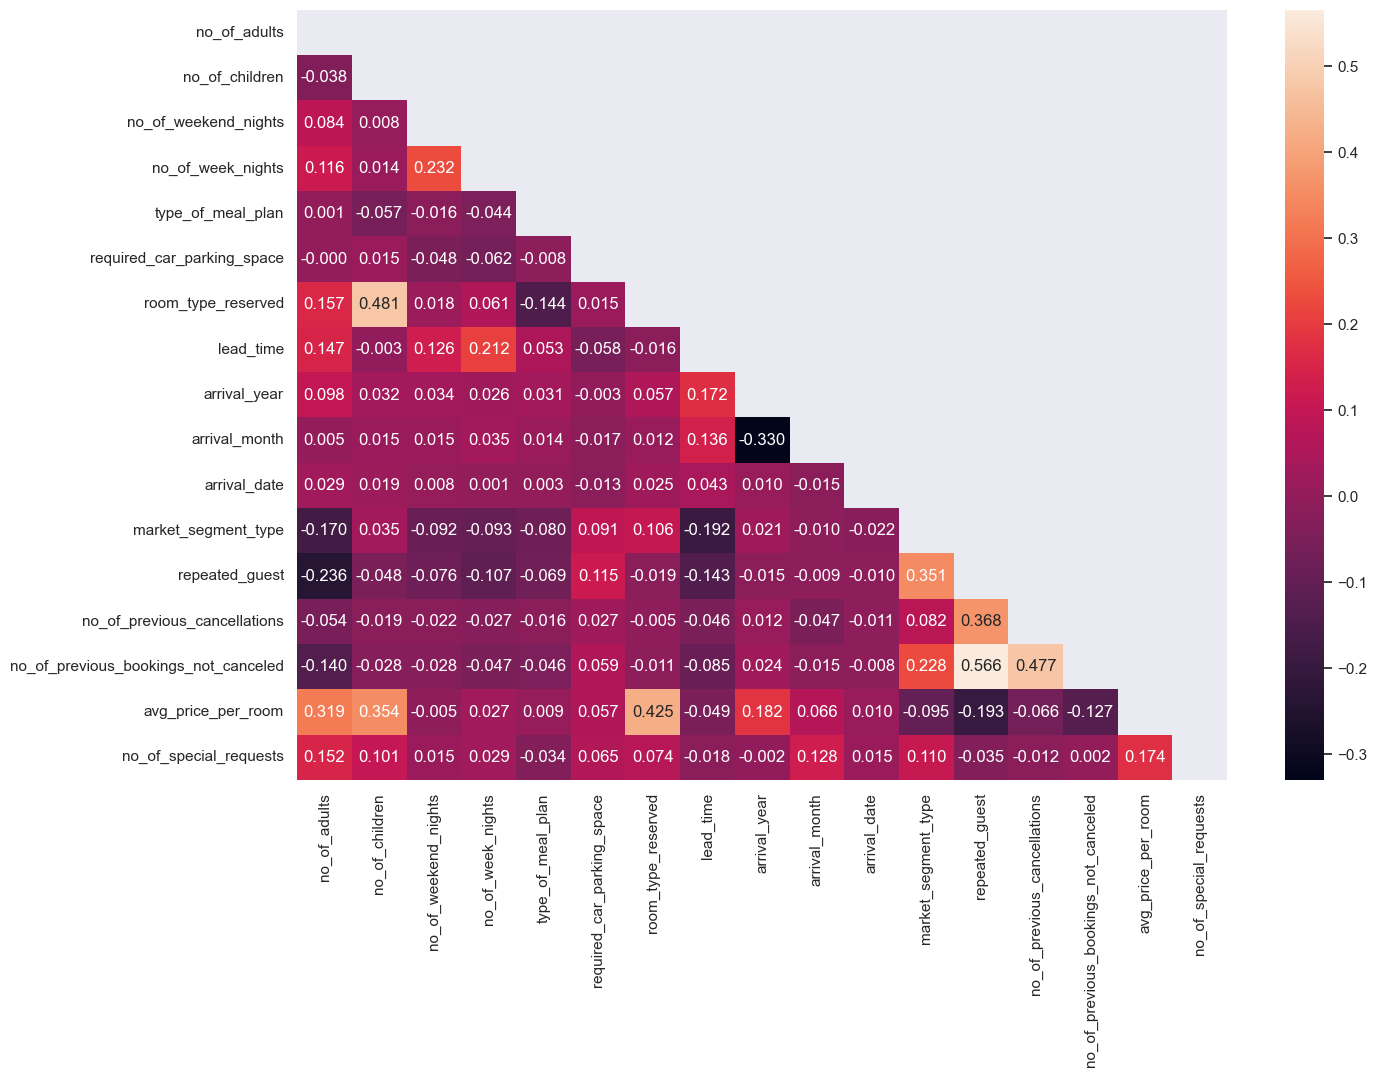

In [119]:
fig, ax = plt.subplots(figsize = [15,10])
mask = np.triu(features.corr())
sns.heatmap(features.corr(),fmt='.3f',annot = True, ax = ax, mask = mask)